# House Sales Price Analysis

In [801]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [802]:
#read csv
import pandas as pd
housing = pd.read_csv("train.csv")

In [803]:
housing.shape

(1460, 81)

In [804]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [805]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [806]:
# Numeric variables in the dataset
house_numeric = housing.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [807]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [808]:
# Columns to be treated as categorical variables are dropped
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [809]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fed984cca90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed984ccf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed984cc820>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed984cc280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fedd3a99190>],
 'means': []}

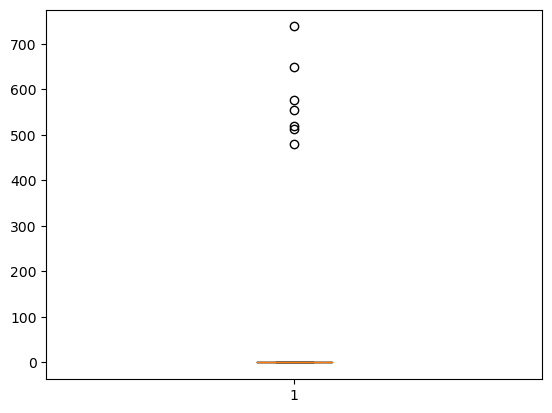

In [810]:
plt.boxplot(housing['PoolArea'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fedd3421d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fedd342f310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fedd3421b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fedd342f8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fedd342fb80>],
 'means': []}

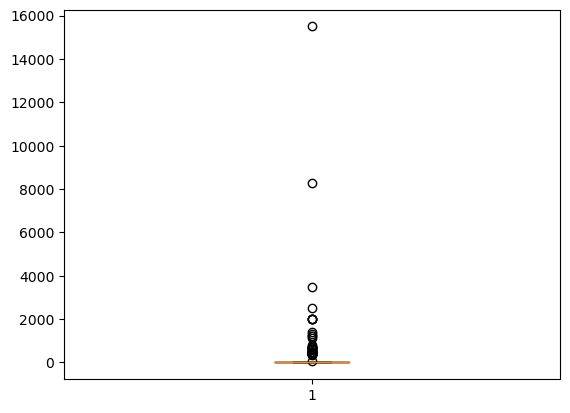

In [811]:
plt.boxplot(housing['MiscVal'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fed8825d940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed8825dee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed8825d790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed8826e4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed8826e730>],
 'means': []}

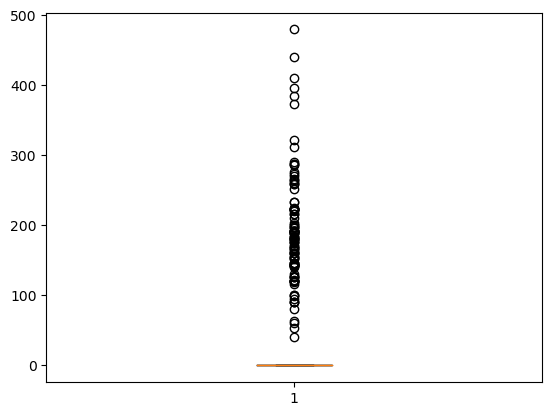

In [812]:
plt.boxplot(housing['ScreenPorch'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fedd3bff6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fedd3bffac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fedd3bff430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fedd3c0e070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fedd3c0e340>],
 'means': []}

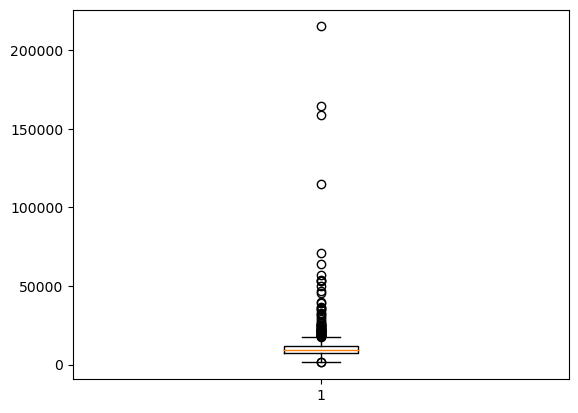

In [813]:
plt.boxplot(housing['LotArea'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fedd3af5850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fedd3af5df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fedd3af5580>],
 'medians': [<matplotlib.lines.Line2D at 0x7fedd3b033d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fedd3b036a0>],
 'means': []}

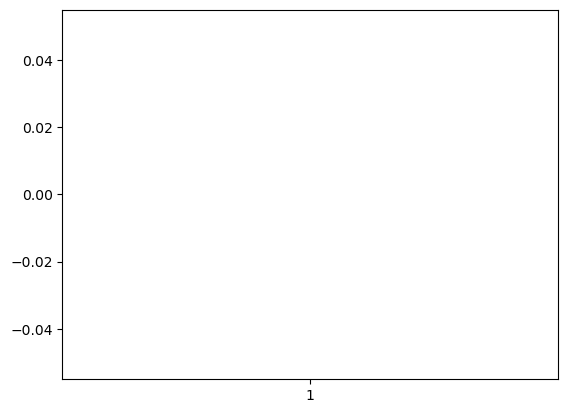

In [814]:
plt.boxplot(housing['MasVnrArea'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fed9834e3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed9834e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fedd3ae7220>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed9834eee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed9835b1f0>],
 'means': []}

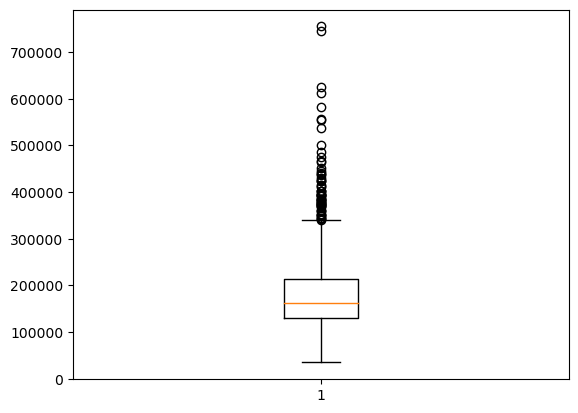

In [815]:
plt.boxplot(housing['SalePrice'])

## Remove Outliers

In [816]:
columns_to_check = ['PoolArea','MiscVal','ScreenPorch', 'LotArea', 'MasVnrArea','SalePrice']

def remove_outliers(df, column_names):
    filtered_df = df.copy()
    for column_name in column_names:
        Q1 = df[column_name].quantile(0.1)
        Q3 = df[column_name].quantile(0.9)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        filtered_df = filtered_df[(filtered_df[column_name] >= lower_bound) & (filtered_df[column_name] <= upper_bound)]
        
    return filtered_df


housing = remove_outliers(housing, columns_to_check)

In [817]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1254 non-null   int64  
 1   MSSubClass     1254 non-null   int64  
 2   MSZoning       1254 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1254 non-null   int64  
 5   Street         1254 non-null   object 
 6   Alley          82 non-null     object 
 7   LotShape       1254 non-null   object 
 8   LandContour    1254 non-null   object 
 9   Utilities      1254 non-null   object 
 10  LotConfig      1254 non-null   object 
 11  LandSlope      1254 non-null   object 
 12  Neighborhood   1254 non-null   object 
 13  Condition1     1254 non-null   object 
 14  Condition2     1254 non-null   object 
 15  BldgType       1254 non-null   object 
 16  HouseStyle     1254 non-null   object 
 17  OverallQual    1254 non-null   int64  
 18  OverallC

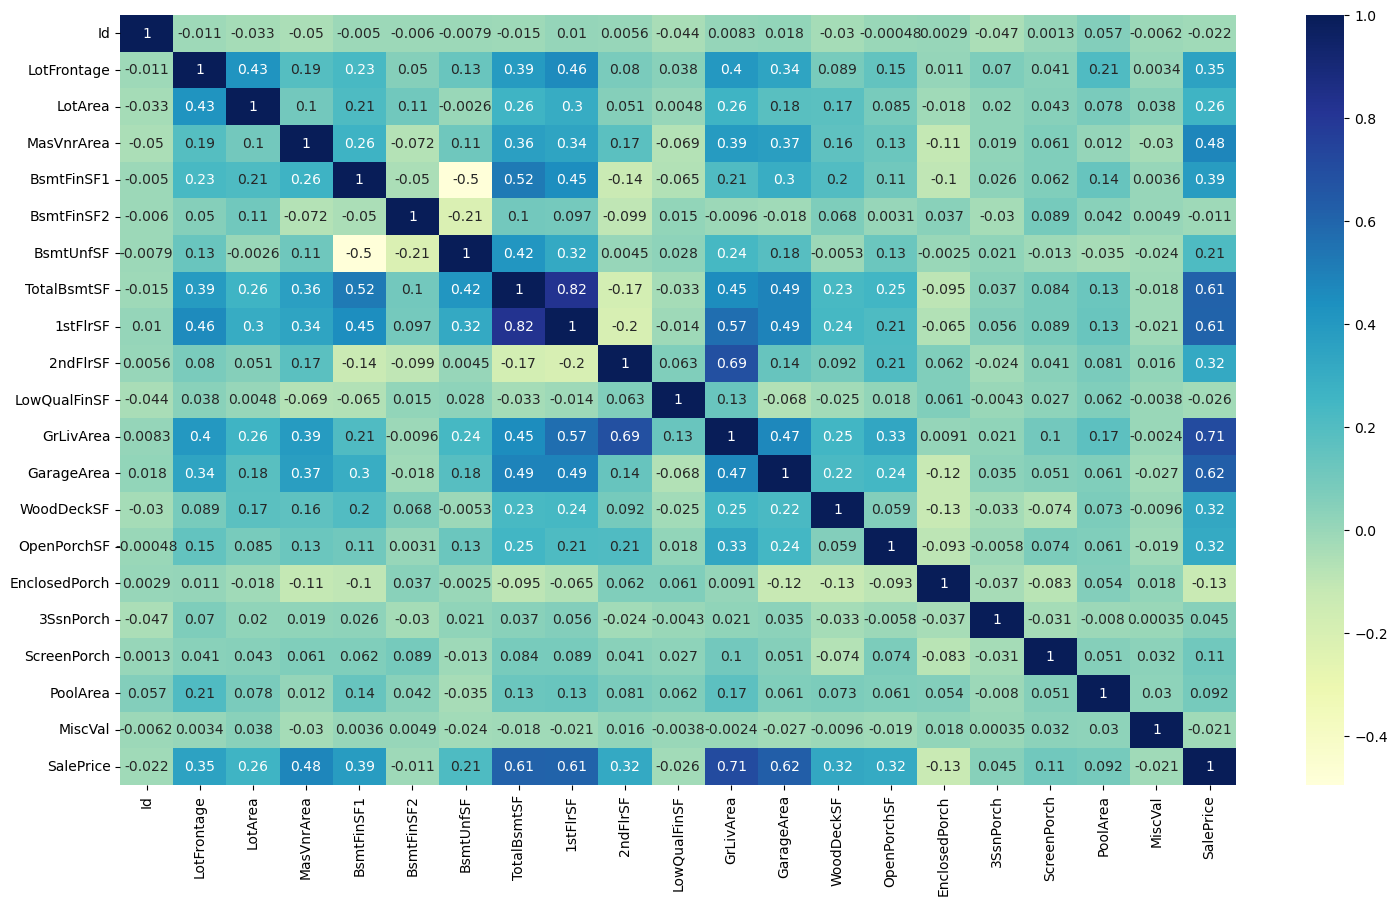

In [818]:
# correlation matrix
cor = house_numeric.corr()

#plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [819]:
# Data Cleaning

housing.isnull().sum()  #checking the number of null values in the dataset

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [820]:
# Percentage of Missing values
round(100*(housing.isnull().sum()/len(housing.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      16.99
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [821]:
## Null value treatment

#### NA meaning for Alley, PoolQC ad Fence is as below
    - No Allay
    - No Pool
    - No Fence

In [822]:


housing['Alley'].fillna('No Alley', inplace=True)

housing['PoolQC'].fillna('No Pool', inplace=True)
                   
housing['Fence'].fillna('No Fence', inplace=True)
                       
housing['MasVnrArea'].fillna(0, inplace=True) 

### NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

In [823]:


housing['GarageType'].fillna('No Garage', inplace=True) 
housing['GarageFinish'].fillna('No Garage', inplace=True) 
housing['GarageQual'].fillna('No Garage', inplace=True) 
housing['GarageCond'].fillna('No Garage', inplace=True) 

In [824]:
# MiscFeature has 99% NULL values. Droping the column
housing= housing.drop('MiscFeature', axis=1)

In [825]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [826]:
#converting year to number of years

housing['YearBuilt'] = 2019 - housing['YearBuilt']
housing['YearRemodAdd'] = 2019 - housing['YearRemodAdd']
housing['GarageYrBlt'] = 2019 - housing['GarageYrBlt']
housing['YrSold'] = 2019 - housing['YrSold']

In [827]:
#converting from int type to object to treat the variables as categorical variables

housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')
housing['FullBath'] = housing['FullBath'].astype('object')
housing['HalfBath'] = housing['HalfBath'].astype('object')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('object')
housing['Fireplaces'] = housing['Fireplaces'].astype('object')
housing['GarageCars'] = housing['GarageCars'].astype('object')

In [828]:
housing_final = housing

In [829]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
housing_final[varlist1] = housing_final[varlist1].apply(binary_map)

In [830]:
# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
housing_final[varlist2] = housing_final[varlist2].apply(binary_map)

In [831]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
housing_final[varlist3] = housing_final[varlist3].apply(binary_map)

In [832]:
# split into X and y
X = housing_final.drop([ 'Id'], axis=1)

In [833]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [834]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [835]:
# drop categorical variables 
housing_final = housing_final.drop(list(house_categorical.columns), axis=1)

In [836]:
# concat dummy variables with X
housing_final = pd.concat([housing_final, house_dummies], axis=1)

In [837]:
X = housing_final.head(1253)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

In [838]:
X = X.fillna(X.interpolate())

In [839]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [840]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Ridge Regression

In [841]:
# list of alphas to tune
params = {'alpha': [0.0001, .0002, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [842]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.07278540782715667


In [843]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010016,0.006729,0.002244,0.000510,0.0001,{'alpha': 0.0001},-0.092003,-0.107248,-0.090483,-0.086229,...,-0.092277,0.007887,25,-0.045265,-0.046119,-0.046690,-0.047728,-0.048022,-0.046765,0.001018
1,0.006417,0.000589,0.001843,0.000057,0.0002,{'alpha': 0.0002},-0.091992,-0.107173,-0.090467,-0.086216,...,-0.092252,0.007863,24,-0.045267,-0.046121,-0.046690,-0.047729,-0.048023,-0.046766,0.001018
2,0.006217,0.000340,0.001831,0.000037,0.001,{'alpha': 0.001},-0.091901,-0.106587,-0.090340,-0.086111,...,-0.092056,0.007676,23,-0.045279,-0.046138,-0.046693,-0.047739,-0.048032,-0.046776,0.001016
3,0.005896,0.000472,0.002388,0.000993,0.01,{'alpha': 0.01},-0.091016,-0.101697,-0.089234,-0.085261,...,-0.090360,0.006156,22,-0.045403,-0.046372,-0.046725,-0.047841,-0.048136,-0.046896,0.000996
4,0.006792,0.001745,0.002023,0.000252,0.05,{'alpha': 0.05},-0.088693,-0.091969,-0.086596,-0.083058,...,-0.086585,0.003512,21,-0.045942,-0.047285,-0.046849,-0.048264,-0.048662,-0.047400,0.000978
5,0.006249,0.000435,0.002007,0.000230,0.1,{'alpha': 0.1},-0.086932,-0.087065,-0.084847,-0.081314,...,-0.084267,0.002590,20,-0.046431,-0.047975,-0.047030,-0.048741,-0.049236,-0.047883,0.001040
6,0.005677,0.000351,0.002675,0.001042,0.2,{'alpha': 0.2},-0.085206,-0.082933,-0.083083,-0.078730,...,-0.081820,0.002489,19,-0.047146,-0.048750,-0.047427,-0.049460,-0.050036,-0.048564,0.001123
7,0.005741,0.000285,0.001877,0.000160,0.3,{'alpha': 0.3},-0.084078,-0.081017,-0.082160,-0.076799,...,-0.080343,0.002737,18,-0.047692,-0.049245,-0.047716,-0.050039,-0.050539,-0.049046,0.001171
8,0.005758,0.000218,0.002048,0.000204,0.4,{'alpha': 0.4},-0.083215,-0.079871,-0.081561,-0.075309,...,-0.079293,0.002983,17,-0.048148,-0.049610,-0.047942,-0.050494,-0.050920,-0.049423,0.001204
9,0.005802,0.000254,0.002975,0.001400,0.5,{'alpha': 0.5},-0.082455,-0.078908,-0.081122,-0.074146,...,-0.078472,0.003140,16,-0.048552,-0.049916,-0.048135,-0.050867,-0.051239,-0.049742,0.001228


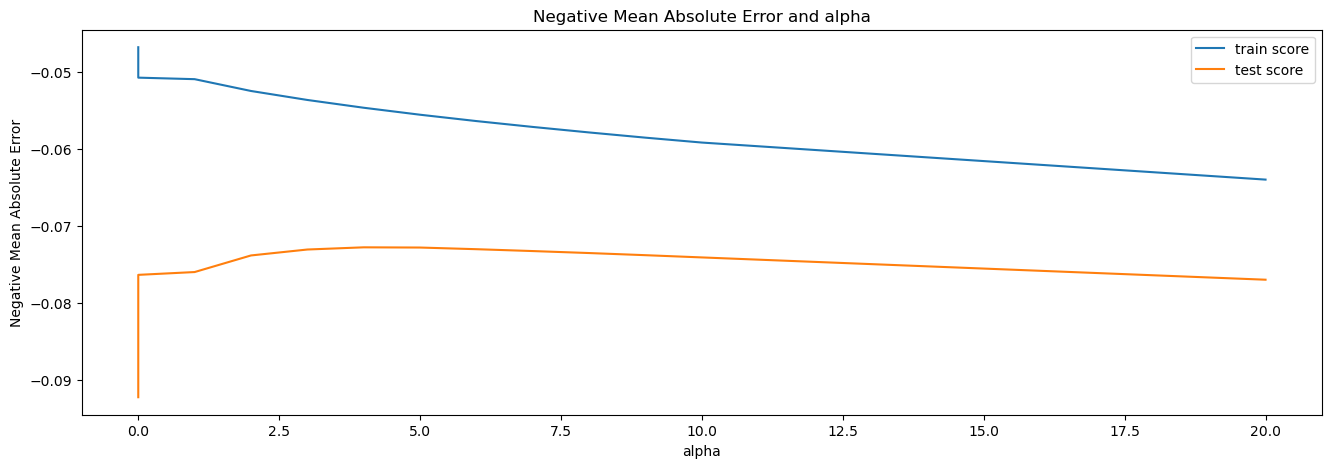

In [844]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [845]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.82650466e-06,  1.25541434e-04,  7.80477776e-06, -1.72102249e-02,
        0.00000000e+00, -2.66275325e-03, -1.11329657e-03, -1.06664257e-05,
        6.44446763e-05,  6.91389191e-05, -2.39648475e-05,  1.09618748e-04,
        4.65330682e-02,  5.63800493e-05,  1.05306505e-04,  3.65082816e-05,
        1.98194818e-04,  3.94772388e-04,  1.32811451e-04,  1.23196210e-04,
        2.27603020e-04,  9.58853198e-05,  1.70695233e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.03508057e-03,  6.88774458e-04,
        6.97152036e-04,  7.61251521e-03,  3.41567716e-02,  8.99149464e-03,
       -2.94727384e-02,  5.07596040e-02,  2.19339176e-02, -1.32501257e-02,
       -2.04682966e-02, -8.39118669e-03,  2.09797348e-02, -6.58471176e-02,
       -6.82124708e-03,  4.64046501e-03,  3.69560334e-02,  3.02395900e-02,
        5.10342631e-02,  2.69094850e-02,  2.25677972e-03,  2.19629122e-02,
       -2.10618197e-02, -3.70944843e-02, -3.09141332e-03,  1.42083885e-02,
       -4.31890802e-02,  

In [846]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9582981743064287


In [847]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8783915906182079


In [848]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.019017967247778936


## Lasso 

In [849]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [850]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093780,0.036363,0.002258,0.000160,0.0001,{'alpha': 0.0001},-0.079414,-0.075118,-0.079469,-0.070857,...,-0.075478,0.003509,2,-0.050456,-0.051730,-0.049602,-0.052235,-0.053264,-0.051457,0.001295
1,0.055659,0.028611,0.002124,0.000494,0.0002,{'alpha': 0.0002},-0.078113,-0.073802,-0.079819,-0.067827,...,-0.074212,0.004358,1,-0.054159,-0.054262,-0.051898,-0.055042,-0.056307,-0.054334,0.001440
2,0.012796,0.001809,0.002402,0.001273,0.001,{'alpha': 0.001},-0.083074,-0.077145,-0.086741,-0.076392,...,-0.079020,0.005280,3,-0.066822,-0.067093,-0.064867,-0.069386,-0.067291,-0.067092,0.001437
3,0.005131,0.000372,0.001968,0.000510,0.01,{'alpha': 0.01},-0.104442,-0.099388,-0.113098,-0.101597,...,-0.101820,0.007300,4,-0.099237,-0.098842,-0.094830,-0.099578,-0.101893,-0.098876,0.002285
4,0.027371,0.004203,0.029248,0.054993,0.05,{'alpha': 0.05},-0.105586,-0.102842,-0.115079,-0.104396,...,-0.104421,0.006661,5,-0.101869,-0.101322,-0.097642,-0.102374,-0.104002,-0.101442,0.002101
5,0.024509,0.005340,0.001889,0.000276,0.1,{'alpha': 0.1},-0.104657,-0.103935,-0.115733,-0.104674,...,-0.104726,0.006689,6,-0.102376,-0.101691,-0.098190,-0.102648,-0.104416,-0.101864,0.002045
6,0.024773,0.002509,0.001723,0.000012,0.2,{'alpha': 0.2},-0.102614,-0.105160,-0.116387,-0.104991,...,-0.104853,0.006827,7,-0.102803,-0.102053,-0.098693,-0.103107,-0.104979,-0.102327,0.002057
7,0.021526,0.003347,0.001717,0.000011,0.3,{'alpha': 0.3},-0.102323,-0.106350,-0.117023,-0.105263,...,-0.105364,0.006876,8,-0.103489,-0.102717,-0.099456,-0.103579,-0.105496,-0.102948,0.001971
8,0.020620,0.004267,0.001762,0.000089,0.4,{'alpha': 0.4},-0.102471,-0.107588,-0.117782,-0.105683,...,-0.106084,0.006881,9,-0.104226,-0.103447,-0.100445,-0.104376,-0.106209,-0.103741,0.001881
9,0.020868,0.010470,0.001947,0.000297,0.5,{'alpha': 0.5},-0.102811,-0.108909,-0.118888,-0.105935,...,-0.106933,0.006964,10,-0.105149,-0.104323,-0.101584,-0.105268,-0.107161,-0.104697,0.001813


In [851]:
#R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20]},
             return_train_score=True, scoring='r2', verbose=1)

In [852]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093780,0.036363,0.002258,0.000160,0.0001,{'alpha': 0.0001},-0.079414,-0.075118,-0.079469,-0.070857,...,-0.075478,0.003509,2,-0.050456,-0.051730,-0.049602,-0.052235,-0.053264,-0.051457,0.001295
1,0.055659,0.028611,0.002124,0.000494,0.0002,{'alpha': 0.0002},-0.078113,-0.073802,-0.079819,-0.067827,...,-0.074212,0.004358,1,-0.054159,-0.054262,-0.051898,-0.055042,-0.056307,-0.054334,0.001440
2,0.012796,0.001809,0.002402,0.001273,0.001,{'alpha': 0.001},-0.083074,-0.077145,-0.086741,-0.076392,...,-0.079020,0.005280,3,-0.066822,-0.067093,-0.064867,-0.069386,-0.067291,-0.067092,0.001437
3,0.005131,0.000372,0.001968,0.000510,0.01,{'alpha': 0.01},-0.104442,-0.099388,-0.113098,-0.101597,...,-0.101820,0.007300,4,-0.099237,-0.098842,-0.094830,-0.099578,-0.101893,-0.098876,0.002285
4,0.027371,0.004203,0.029248,0.054993,0.05,{'alpha': 0.05},-0.105586,-0.102842,-0.115079,-0.104396,...,-0.104421,0.006661,5,-0.101869,-0.101322,-0.097642,-0.102374,-0.104002,-0.101442,0.002101
5,0.024509,0.005340,0.001889,0.000276,0.1,{'alpha': 0.1},-0.104657,-0.103935,-0.115733,-0.104674,...,-0.104726,0.006689,6,-0.102376,-0.101691,-0.098190,-0.102648,-0.104416,-0.101864,0.002045
6,0.024773,0.002509,0.001723,0.000012,0.2,{'alpha': 0.2},-0.102614,-0.105160,-0.116387,-0.104991,...,-0.104853,0.006827,7,-0.102803,-0.102053,-0.098693,-0.103107,-0.104979,-0.102327,0.002057
7,0.021526,0.003347,0.001717,0.000011,0.3,{'alpha': 0.3},-0.102323,-0.106350,-0.117023,-0.105263,...,-0.105364,0.006876,8,-0.103489,-0.102717,-0.099456,-0.103579,-0.105496,-0.102948,0.001971
8,0.020620,0.004267,0.001762,0.000089,0.4,{'alpha': 0.4},-0.102471,-0.107588,-0.117782,-0.105683,...,-0.106084,0.006881,9,-0.104226,-0.103447,-0.100445,-0.104376,-0.106209,-0.103741,0.001881
9,0.020868,0.010470,0.001947,0.000297,0.5,{'alpha': 0.5},-0.102811,-0.108909,-0.118888,-0.105935,...,-0.106933,0.006964,10,-0.105149,-0.104323,-0.101584,-0.105268,-0.107161,-0.104697,0.001813


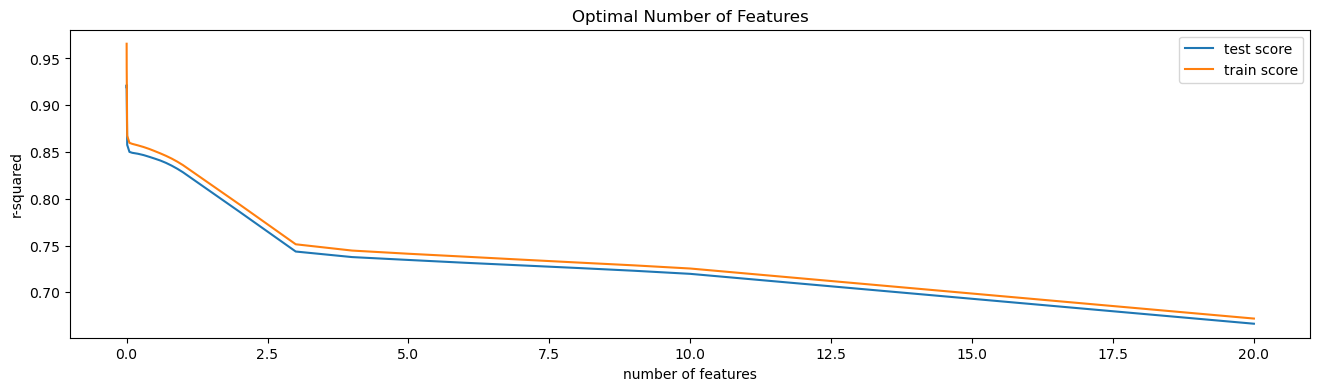

In [853]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [854]:
#value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0002}
-0.07421181517580404


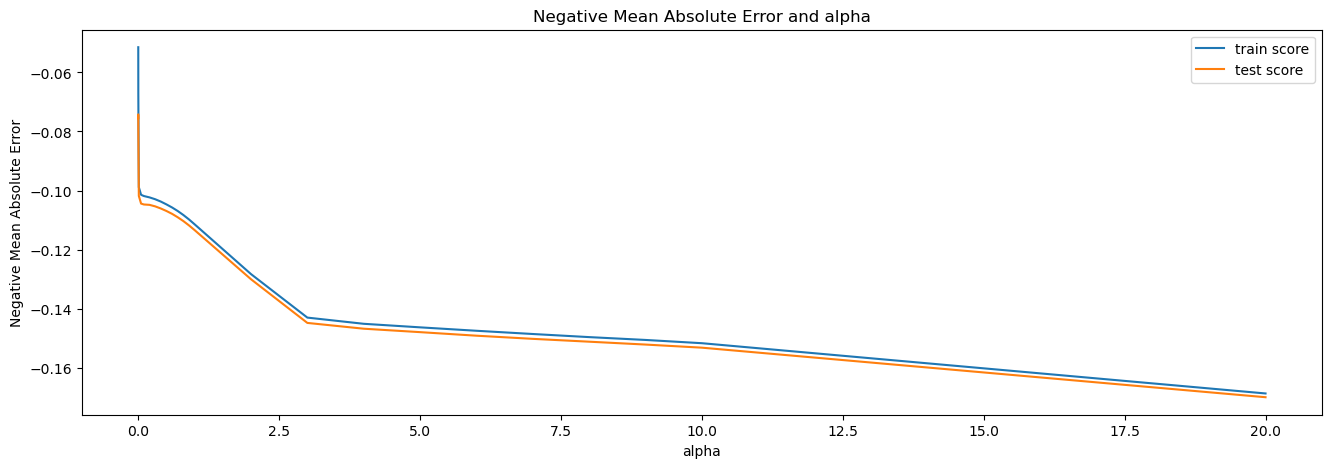

In [855]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [856]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [857]:
#predict R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9621843230160377


In [858]:
#Predict R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.874179726955011


In [859]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.019676647725601085


In [860]:
## Most predictor variables for Ridge (alpha = 4) and Lasso (alpha = .0001)
## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge_alpha4'] =      ridge.coef_
betas['Lasso_alpha_.0001'] = lasso.coef_


In [861]:
## View the number of features removed by lasso
betas[betas['Lasso_alpha_.0001']==0].shape

(88, 2)

In [862]:
##top 5 coefficients of Ridge regression
betas['Ridge_alpha4'].sort_values(ascending=False)[:5]

Neighborhood_Crawfor    0.115189
OverallCond_9           0.101665
OverallQual_9           0.094293
Exterior1st_BrkFace     0.083142
OverallCond_8           0.083087
Name: Ridge_alpha4, dtype: float64

In [863]:
##top 5 coefficients of Lasso regression
betas['Lasso_alpha_.0001'].sort_values(ascending=False)[:5]

Neighborhood_Crawfor    0.156330
OverallQual_9           0.144760
Exterior1st_Stucco      0.141526
OverallCond_9           0.138120
OverallQual_10          0.116798
Name: Lasso_alpha_.0001, dtype: float64

## # Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [864]:
## optimal value for alpha
#    - Ridge = 4
#    - Lasso = .0001

In [865]:
# double alpha for ridge
alpha = 8
ridge_1 = Ridge(alpha=alpha)

ridge_1.fit(X_train, y_train)
ridge_1.coef_

array([-9.78597041e-06,  1.12096509e-04,  7.89767944e-06, -9.56842126e-03,
        0.00000000e+00, -2.59110946e-03, -1.32075884e-03,  1.01267731e-06,
        6.98265258e-05,  6.57598183e-05, -2.29238233e-05,  1.12662518e-04,
        4.98801204e-02,  6.17327729e-05,  1.09440146e-04,  2.50307815e-05,
        1.96203689e-04,  4.20589313e-04,  1.43141593e-04,  1.25038247e-04,
        2.48323229e-04,  1.05437786e-04,  1.74180534e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -9.45358163e-04,  7.32719044e-04,
       -6.43363727e-03,  5.28192682e-03,  2.27898666e-02,  5.84116985e-03,
       -2.38689327e-02,  5.02188126e-02,  1.74637479e-02, -1.12585474e-02,
       -1.25463831e-02, -5.37673161e-03,  2.20184297e-02, -5.58830228e-02,
       -6.01847914e-03,  5.24979510e-03,  2.86356811e-02,  1.48812668e-02,
        3.86233379e-02,  7.00405472e-03,  1.52974159e-03,  1.88356314e-02,
       -1.82496142e-02, -2.70932824e-02, -4.41133533e-03,  1.72965880e-02,
       -3.19697885e-02,  

In [866]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge_1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9540353734547324


In [867]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge_1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8791266357970274


In [868]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))

RMSE is: 
 0.019643967644830385


#### Double the alpha for Lasso (.0002)

In [869]:
# double alpha for Lasso
alpha = 0.0002

lasso_1 = Lasso(alpha=alpha)
        
lasso_1.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [870]:
#predict R-squared value of test and train data
y_train_pred = lasso_1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9579109701491473


In [871]:
#Predict R-squared value of test and train data
y_test_pred = lasso_1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8778923509754016


In [872]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.019096041808773116


In [873]:
##### Summary ######

########## Ridge #########
#          alpha      X_train  X_test
#   alpha     4       .958      .878
#   alpha     8       .948      .879

########## Lasso #########
#           alpha      X_train  X_test
#   alpha  .0001       .962      .879 
#   alpha  .0002       .957      .877
 


In [874]:

## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge_alpha8'] =      ridge_1.coef_
betas['Lasso_alpha_.0002'] = lasso_1.coef_

##top 5 coefficients of Ridge regression
betas['Ridge_alpha8'].sort_values(ascending=False)[:5]


Neighborhood_Crawfor    0.098973
OverallCond_9           0.077265
OverallQual_9           0.076181
OverallCond_8           0.071630
SaleCondition_Normal    0.069565
Name: Ridge_alpha8, dtype: float64

In [875]:

##top 5 coefficients of Lasso regression
betas['Lasso_alpha_.0002'].sort_values(ascending=False)[:5]

OverallQual_9           0.152613
Neighborhood_Crawfor    0.151378
OverallCond_9           0.134988
OverallQual_10          0.122588
Exterior1st_Stucco      0.102448
Name: Lasso_alpha_.0002, dtype: float64

## Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [876]:
## Answer : Both Ridge and Lasso have very close R2 score for train and test data. But when 
# we have more number of Betas then it is good to choose Lasso because it eliminate less impact Betas

## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. 
Which are the five most important predictor variables now?

In [877]:
## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
Id
LotFrontage
LotArea
Street
Utilities
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [878]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_

In [879]:
betas['Lasso'] = lasso.coef_

In [880]:
betas.head()

,Ridge,Lasso
Id,-0.000009,-0.000009
LotFrontage,0.000126,0.000209
LotArea,0.000008,0.000008
Street,-0.017210,-0.000000
Utilities,0.000000,0.000000


In [881]:
## top 5 coefficients of Ridge regression
betas['Ridge'].sort_values(ascending=False)[:5]

Neighborhood_Crawfor    0.115189
OverallCond_9           0.101665
OverallQual_9           0.094293
Exterior1st_BrkFace     0.083142
OverallCond_8           0.083087
Name: Ridge, dtype: float64

In [882]:
## top 10 coefficients of Lasso
betas['Lasso'].sort_values(ascending=False)[:5]

Neighborhood_Crawfor    0.156330
OverallQual_9           0.144760
Exterior1st_Stucco      0.141526
OverallCond_9           0.138120
OverallQual_10          0.116798
Name: Lasso, dtype: float64

In [883]:
## Top 5 Lasso coeff

top5coeff = ['Neighborhood_Crawfor', 'OverallQual_9', 'Exterior1st_Stucco', 'OverallCond_9', 'OverallQual_10' ]

In [884]:
## drop them from train and test data
X_train_drop = X_train.drop(top5coeff, axis=1)
X_test_drop = X_test.drop(top5coeff, axis=1)

In [885]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, .0002, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}

lasso_2 = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso_2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_drop, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Users/ashwanikumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.695e+00, tolerance: 1.053e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [886]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.0002}

In [887]:
# Create a lasso instance with optimum value alpha=0.001
lasso_2 = Lasso(alpha=0.0002)

In [888]:
# Fit the model on training data
lasso_2.fit(X_train_drop, y_train)

Lasso(alpha=0.0002)

In [889]:
## Make predictions
y_train_pred = lasso_2.predict(X_train_drop)
y_pred = lasso_2.predict(X_test_drop)

In [890]:
#predict R-squared value of test and train data
y_train_pred = lasso_2.predict(X_train_drop)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9548915088387196


In [891]:
#Predict R-squared value of test and train data
y_test_pred = lasso_2.predict(X_test_drop)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8743886963253551


In [892]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.019643967644830385


In [893]:

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_drop.columns)
betas.rows = X_train_drop.columns
betas['Lasso_2'] = lasso_2.coef_

In [894]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso_2'].sort_values(ascending=False)[:5]

SaleType_CWD             0.106182
Exterior1st_BrkFace      0.085790
SaleCondition_Partial    0.081654
SaleCondition_Normal     0.078215
BsmtFullBath_2           0.072939
Name: Lasso_2, dtype: float64

In [895]:
##### TOP 5 Lasso coefficients after dropping 5 ####
# SaleType_CWD             0.106182
# Exterior1st_BrkFace      0.085790
# SaleCondition_Partial    0.081654
# SaleCondition_Normal     0.078215
# BsmtFullBath_2           0.072939

### Question 4

How can you make sure that a model is robust and generalisable? 
What are the implications of the same for the accuracy of the model and why?

In [896]:
# 1. Simple models are more robust and generalised.
# 2. Overfit models have high variance, such models fail to predict the unseen data.
# 3. Complex models have high accuracy but to make it robust and genralised we reduce the variance which 
#     Leads to bias. By adding Bias accuracy decreases.
# 4. Lasso and Ridge models helps to find a balance between Accuracy and complexity.